In [1]:
import time
from glob import glob

import os

from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import cv2

from sklearn.model_selection import train_test_split

In [2]:
path_test_images = "../raw_data/people_segmentation/images/advert-advertising-banner-blank-40991.jpg"
path_test_mask = "../raw_data/people_segmentation/masks/advert-advertising-banner-blank-40991.png"

In [3]:
def create_dir(path):
    if os.path.exists(path):
        print("The file already exists")
    else :
        os.mkdir(path)

In [4]:
def open_img(path):
    my_img = Image.open(path)
    image_sequence = my_img.getdata()
    image_array = np.array(image_sequence)
    if len(image_array.shape) > 1:
        new_img = np.reshape(image_array,(-1,my_img.width,3))
    else:
        new_img = np.reshape(image_array,(-1,my_img.width))
    plt.imshow(new_img)
    plt.show()

In [5]:
def get_array(path):
    my_img = Image.open(path)
    image_sequence = my_img.getdata()
    image_array = np.array(image_sequence)
    if len(image_array.shape) > 1:
        return np.reshape(image_array,(-1,my_img.width,3))
    return np.reshape(image_array,(-1,my_img.width))
    

In [6]:
def crop_data(image, height, width): 
    #trouver le centre
    center = (round(image.shape[0]/2), round(image.shape[1]/2))
    #déterminer les dimension
    return image[int(center[0]-height/2):int(center[0]+height/2),int(center[1]-width/2):int(center[1]+width/2),]

In [7]:
def copy_split_data(X, Y, path, train_split=0.8):
    create_dir(path)
    create_dir(path+"train")
    create_dir(path+"test")
    create_dir(path+"train/X")
    create_dir(path+"train/Y/")
    create_dir(path+"test/X/")
    create_dir(path+"test/Y/")
    X_train, y_train, X_test, y_test = [],[],[],[]
    n_train = round(len(X)*train_split)
    n_test = len(X)- n_train
    k = 1
    X = sorted(X)
    Y = sorted(Y)
    for x, y in zip(X[:n_train],Y[:n_train]):
        x = cv2.imread(x)
        X_train.append(x)
        cv2.imwrite(path+"train/X/"+f"img_{k}.png", x)
        y = cv2.imread(y)
        y_train.append(y*255)
        cv2.imwrite(path+"train/Y/"+f"img_{k}.png", y*255)
        k +=1
    for x, y in zip(X[n_train:],Y[n_train:]):
        x = cv2.imread(x)
        X_test.append(x)
        cv2.imwrite(path+"test/X/"+f"img_{k}.png", x)
        y = cv2.imread(y)
        y_test.append(y*255)
        cv2.imwrite(path+"test/Y/"+f"img_{k}.png", y*255)
        k +=1
    return X_train, y_train, X_test, y_test

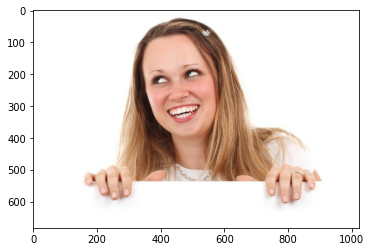

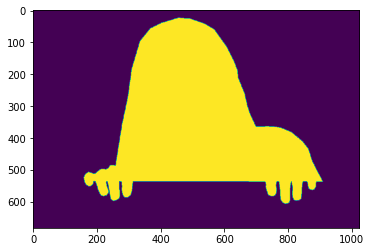

(None, None)

In [8]:
open_img(path_test_images), open_img(path_test_mask)

In [9]:
images_path = "../raw_data/people_segmentation/images/"
masks_path = "../raw_data/people_segmentation/masks/"

In [10]:
X = glob(images_path+"*.jpg")
Y = glob(masks_path+"*.png")

In [11]:
path_to_copy = "../paittern/data/"

In [17]:
os.path.join("..","paittern","data")

'../paittern/data'

In [12]:
%%time
X_train, y_train, X_test, y_test = copy_split_data(X, Y, path_to_copy)

The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
The file already exists
CPU times: user 2min 43s, sys: 48.8 s, total: 3min 32s
Wall time: 3min 50s


In [13]:
%%time
X_c_resized = [cv2.resize(X_train[k], dsize=(256, 256), 
                          interpolation = cv2.INTER_CUBIC) for k in range(len(X_train))]

CPU times: user 7.64 s, sys: 34.6 s, total: 42.2 s
Wall time: 18.1 s


In [14]:
%%time
y_c_resized = [cv2.resize(y_train[k], dsize=(256, 256), 
                          interpolation = cv2.INTER_CUBIC) for k in range(len(y_train))]

CPU times: user 8.12 s, sys: 29.6 s, total: 37.7 s
Wall time: 11.8 s


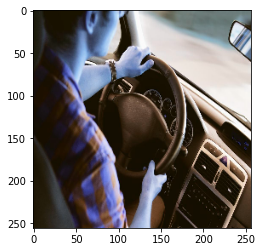

In [15]:
plt.imshow(X_c_resized[0])

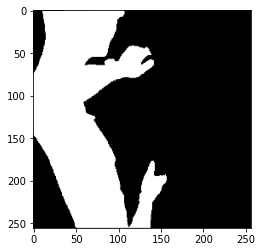

In [16]:
plt.imshow(y_c_resized[0])

In [18]:
!pip install paittern

ERROR: Could not find a version that satisfies the requirement paittern (from versions: none)
ERROR: No matching distribution found for paittern


In [20]:
from paittern.paittern import contouring

ModuleNotFoundError: No module named 'paittern'